In [203]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/finance2_train.csv'
path_test=working_directory+'/finance2_test.csv'
path_submit=working_directory+'/finance2_submit.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_submit=pd.read_csv(path_submit)

In [204]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

In [205]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')

In [206]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)

In [207]:
df_train.tail

<bound method NDFrame.tail of                   High         Low        Open       Close
Date                                                      
2003-01-23  100.416900   99.950797  100.314203  100.235198
2003-01-24  100.930402  100.172002  100.251001  100.717098
2003-01-27  101.862602  100.717098  100.796097  101.467602
2003-01-28  101.688801  101.135803  101.483405  101.491301
2003-01-29  101.609796  101.033100  101.483405  101.341199
...                ...         ...         ...         ...
2011-07-07   92.264890   90.571922   92.174042   92.193787
2011-07-10   90.644598   88.792047   90.489759   90.492917
2011-07-11   89.125431   86.571360   89.072500   89.074079
2011-07-12   88.502120   87.532002   87.532002   87.530417
2011-07-13   89.185468   88.197968   88.693297   88.732800

[2187 rows x 4 columns]>

In [208]:
# Shift/Diff/Up作成用関数
def Diff(data_from,data_to):
    shift=data_to.shift(-1)
    diff=shift-data_from
    diff2=diff.interpolate()
    shift=shift.interpolate()
    updown=diff2.apply(lambda x:1 if x>=0 else 0)
    return shift,diff2,updown

In [209]:
#翌日終値と当日終値の差のカラム（Diff）を作成
df_train["Shift"],df_train["Diff"],df_train["Up"] = Diff(df_train["Close"],df_train["Close"])
df_test["Shift"],df_test["Diff"],df_test["Up"] = Diff(df_test["Close"],df_test["Close"])

In [210]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
                  High         Low        Open       Close       Shift  \
Date                                                                     
2003-01-23  100.416900   99.950797  100.314203  100.235198  100.717098   
2003-01-24  100.930402  100.172002  100.251001  100.717098  101.467602   
2003-01-27  101.862602  100.717098  100.796097  101.467602  101.491301   
2003-01-28  101.688801  101.135803  101.483405  101.491301  101.341199   
2003-01-29  101.609796  101.033100  101.483405  101.341199  101.736199   
...                ...         ...         ...         ...         ...   
2011-07-07   92.264890   90.571922   92.174042   92.193787   90.492917   
2011-07-10   90.644598   88.792047   90.489759   90.492917   89.074079   
2011-07-11   89.125431   86.571360   89.072500   89.074079   87.530417   
2011-07-12   88.502120   87.532002   87.532002   87.530417   88.732800   
2011-07-13   89.185468   88.197968   88.693297   88.732800   88.732800   

                Diff  Up  
Date

In [211]:
# drop = ['Diff','Up','Shift']
drop = ['Shift','Up']

df_train = df_train.drop(columns=drop,axis=1) 
df_test = df_test.drop(columns=drop,axis=1) 

In [212]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
                  High         Low        Open       Close      Diff
Date                                                                
2003-01-23  100.416900   99.950797  100.314203  100.235198  0.481900
2003-01-24  100.930402  100.172002  100.251001  100.717098  0.750504
2003-01-27  101.862602  100.717098  100.796097  101.467602  0.023699
2003-01-28  101.688801  101.135803  101.483405  101.491301 -0.150102
2003-01-29  101.609796  101.033100  101.483405  101.341199  0.395000
...                ...         ...         ...         ...       ...
2011-07-07   92.264890   90.571922   92.174042   92.193787 -1.700870
2011-07-10   90.644598   88.792047   90.489759   90.492917 -1.418838
2011-07-11   89.125431   86.571360   89.072500   89.074079 -1.543662
2011-07-12   88.502120   87.532002   87.532002   87.530417  1.202383
2011-07-13   89.185468   88.197968   88.693297   88.732800  1.202383

[2187 rows x 5 columns]

test
                 High        Low       Open      Close      Diff
D

In [213]:
#学習データ、検証データ、テストデータの作成
drop = ['Diff']

X=df_train.drop(drop,1)
y=df_train[drop]

X_test=df_test.drop(drop,1)

In [214]:
# 
print(f'X\n{X}\n')
print(f'Y\n{y}\n')
print(f'X_test\n{X_test}\n')

X
                  High         Low        Open       Close
Date                                                      
2003-01-23  100.416900   99.950797  100.314203  100.235198
2003-01-24  100.930402  100.172002  100.251001  100.717098
2003-01-27  101.862602  100.717098  100.796097  101.467602
2003-01-28  101.688801  101.135803  101.483405  101.491301
2003-01-29  101.609796  101.033100  101.483405  101.341199
...                ...         ...         ...         ...
2011-07-07   92.264890   90.571922   92.174042   92.193787
2011-07-10   90.644598   88.792047   90.489759   90.492917
2011-07-11   89.125431   86.571360   89.072500   89.074079
2011-07-12   88.502120   87.532002   87.532002   87.530417
2011-07-13   89.185468   88.197968   88.693297   88.732800

[2187 rows x 4 columns]

Y
                Diff
Date                
2003-01-23  0.481900
2003-01-24  0.750504
2003-01-27  0.023699
2003-01-28 -0.150102
2003-01-29  0.395000
...              ...
2011-07-07 -1.700870
2011-07-10 -1.

In [215]:
# 学習データと検証データに80:20の割合で2分割する
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X, y, test_size=0.20, shuffle=False)
X_train

,High,Low,Open,Close
Date,,,,
2003-01-23,100.416900,99.950797,100.314203,100.235198
2003-01-24,100.930402,100.172002,100.251001,100.717098
2003-01-27,101.862602,100.717098,100.796097,101.467602
2003-01-28,101.688801,101.135803,101.483405,101.491301
2003-01-29,101.609796,101.033100,101.483405,101.341199
...,...,...,...,...
2009-11-02,106.199694,104.276842,104.276842,105.495811
2009-11-03,105.814181,104.066697,105.489495,105.180600
2009-11-04,107.202998,104.698699,105.164796,106.522814


In [216]:
y_train

,Diff
Date,
2003-01-23,0.481900
2003-01-24,0.750504
2003-01-27,0.023699
2003-01-28,-0.150102
2003-01-29,0.395000
...,...
2009-11-02,-0.315212
2009-11-03,1.342214
2009-11-04,0.166689


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 1749, number of used features: 4
[LightGBM] [Info] Start training from score 0.003580
Training until validation scores don't improve for 20 rounds
[10]	training's rmse: 0.892701	valid_1's rmse: 0.86919
[20]	training's rmse: 0.892692	valid_1's rmse: 0.86919
[30]	training's rmse: 0.892683	valid_1's rmse: 0.86919
[40]	training's rmse: 0.892674	valid_1's rmse: 0.869189
[50]	training's rmse: 0.892665	valid_1's rmse: 0.869189
[60]	training's rmse: 0.892655	valid_1's rmse: 0.869189
[70]	training's rmse: 0.892646	valid_1's rmse: 0.869189
[80]	training's rmse: 0.892637	valid_1's rmse: 0.869189
[90]	training's rmse: 0.892628	valid_1's rmse: 0.869189
[100]	training's rmse: 0.892619	valid_1's rmse: 0.869189
[110]	training's rmse: 0.89261	valid_1

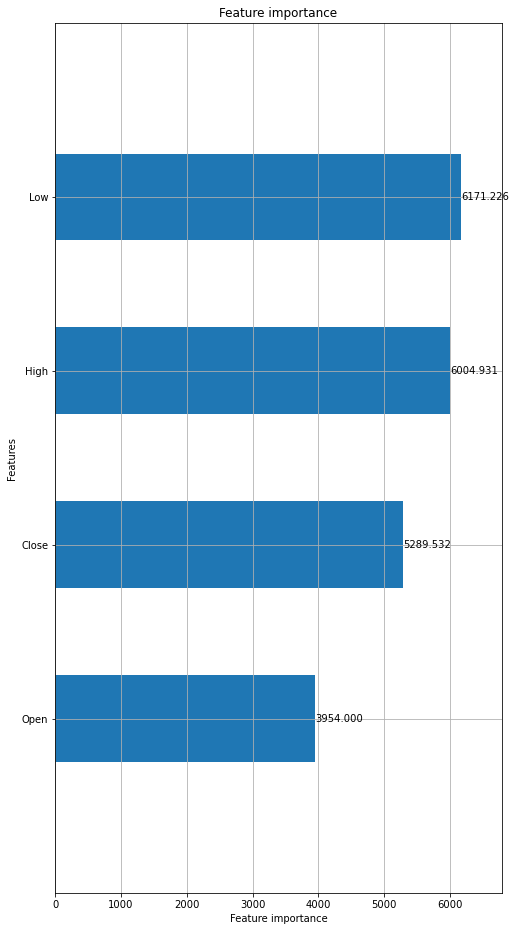

In [217]:
#lightGBM
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
params={"objective":"regression","metrics":"rmse","boosting_type": "gbdt","num_leaves": 31,"learning_rate":0.00001,"min_data_in_leaf":20}
model=lgb.train(params,lgb_train,valid_sets=[lgb_train,lgb_eval],num_boost_round=200,early_stopping_rounds=20,verbose_eval=10)
y_pred = model.predict(X_val, num_iteration=model.best_iteration)
print("RMSE=",np.sqrt(mean_squared_error(y_val,y_pred)))
lgb.plot_importance(model, importance_type="gain", height=0.5, figsize=(8,16))
print(model.params)

In [218]:
#submitデータ作成
#lightGBM
y_pred2 = model.predict(X_test, num_iteration=model.best_iteration)

In [219]:
typeInfo(y_pred2)

y_pred2 は ndarray型
y_pred2 の行数, 列数・・・(1314,)



In [220]:
y_pred2

array([0.0049052 , 0.0049052 , 0.0049052 , ..., 0.00346502, 0.00346502,
       0.00346502])

In [221]:
test_out=df_test['Close']

In [222]:
test_out = [np.array(test_out_data) for test_out_data in test_out]
test_out = np.array(test_out)

In [223]:
test_out

array([88.55109711, 88.26670265, 88.11660072, ..., 96.12720024,
       96.69363251, 96.37209831])

In [224]:
y_pred2_close = y_pred2+test_out

In [225]:
y_pred2_close

array([88.55600231, 88.27160786, 88.12150593, ..., 96.13066527,
       96.69709753, 96.37556334])

In [226]:
y_pred_6=y_pred2_close[5::6]
y_pred_6

array([ 89.48820255,  88.07489742,  86.69476612,  86.59680569,
        84.05616299,  82.37030689,  83.428904  ,  85.03260303,
        83.49210544,  81.27220737,  81.8963081 ,  80.61650593,
        77.98343578,  78.92511684,  79.04440761,  81.74936443,
        85.34860424,  86.25473675,  86.53834766,  84.33108265,
        84.46775593,  81.61190761,  78.89904308,  79.12340641,
        79.31221516,  78.16197414,  76.36867679,  75.25793819,
        77.36960544,  77.60660786,  79.70010303,  79.1755479 ,
        80.09826732,  82.00690761,  80.01294597,  83.76623554,
        84.40692318,  88.27950352,  90.27030689,  94.88641768,
        98.61454051,  98.05905676,  95.53263228,  98.65167422,
        95.35804777, 103.21305203, 102.06180921, 103.75975579,
       104.54500633, 101.8200694 , 101.56490094, 102.20006162,
       104.11445778, 103.76291405, 102.37148786, 102.79119473,
       104.61735467, 105.38445123, 104.93256631, 106.19316614,
       103.99200875, 107.8273983 , 109.86086236, 112.48

In [227]:
len(y_pred_6)

219

In [228]:
Df_Pred_Array = pd.Series(y_pred_6)
Df_Pred_Array

0      89.488203
1      88.074897
2      86.694766
3      86.596806
4      84.056163
         ...    
214    95.552383
215    95.040467
216    95.399123
217    96.411907
218    96.375563
Length: 219, dtype: float64

In [229]:
df_submit[1]=Df_Pred_Array
df_submit

,Date,1
0,2011-07-24,89.488203
1,2011-08-07,88.074897
2,2011-08-21,86.694766
3,2011-09-04,86.596806
4,2011-09-18,84.056163
...,...,...
214,2019-11-06,95.552383
215,2019-11-20,95.040467
216,2019-12-04,95.399123
217,2019-12-18,96.411907


In [230]:
# 線形補間
df_submit=df_submit.interpolate()

In [231]:
df_submit = df_submit.set_index("Date") #indexにDateを指定する。

In [232]:
# 指定の様式（インデックスはDate、カラム名は「y」のみ）をお守りください。
df_submit = df_submit.rename(columns={1: 'y'}) #カラム名「1」を「y」に変更する。
df_submit.to_csv('y_submit.csv') #投稿するファイルを書き出す。
df_submit #投稿する中身を確認する。

,y
Date,
2011-07-24,89.488203
2011-08-07,88.074897
2011-08-21,86.694766
2011-09-04,86.596806
2011-09-18,84.056163
...,...
2019-11-06,95.552383
2019-11-20,95.040467
2019-12-04,95.399123
